In [3]:
import pandas as pd
import numpy as np
import streamlit as st 
import altair as alt
import pydeck as pdk
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('All_ODI_Rankings.csv')
df.head()

,Unnamed: 0,Player Names,Team,Rating,Type,Date,Position
0,0,Virat Kohli,IND,870,Batsmen,2016-01-01,1
1,1,Rohit Sharma,IND,842,Batsmen,2016-01-01,2
2,2,Babar Azam,PAK,837,Batsmen,2016-01-01,3
3,3,Ross Taylor,NZ,818,Batsmen,2016-01-01,4
4,4,Aaron Finch,AUS,791,Batsmen,2016-01-01,5


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,Player Names,Team,Rating,Type,Date,Position
0,Virat Kohli,IND,870,Batsmen,2016-01-01,1
1,Rohit Sharma,IND,842,Batsmen,2016-01-01,2
2,Babar Azam,PAK,837,Batsmen,2016-01-01,3
3,Ross Taylor,NZ,818,Batsmen,2016-01-01,4
4,Aaron Finch,AUS,791,Batsmen,2016-01-01,5


In [5]:
df.dtypes

Player Names    object
Team            object
Rating           int64
Type            object
Date            object
Position         int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
df.sample(n = 5)

,Player Names,Team,Rating,Type,Position
Date,,,,,
2020-03-21,Yuzvendra Chahal,IND,593,Bowler,23
2018-12-27,Mark Wood,ENG,590,Bowler,24
2018-10-06,Tendai Chatara,ZIM,490,Bowler,46
2017-09-21,Thisara Perera,SL,409,Bowler,78
2019-12-20,Rahmat Shah,AFG,559,Batsmen,44


In [8]:
df.dtypes

Player Names    object
Team            object
Rating           int64
Type            object
Position         int64
dtype: object

In [9]:
df.shape

(401940, 5)

In [10]:
df.isnull().sum()

Player Names        0
Team            10962
Rating              0
Type                0
Position            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 401940 entries, 2016-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Player Names  401940 non-null  object
 1   Team          390978 non-null  object
 2   Rating        401940 non-null  int64 
 3   Type          401940 non-null  object
 4   Position      401940 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 18.4+ MB


In [12]:
df.Team.isnull().sum()

10962

In [13]:
df.describe()

,Rating,Position
count,401940.000000,401940.000000
mean,507.272727,46.863636
std,137.404876,29.879029
min,198.000000,1.000000
25%,422.000000,19.000000
50%,495.500000,45.500000
75%,598.750000,73.000000
max,870.000000,100.000000


In [14]:
df[(df.Rating > 800) & (df.index >= '2019')]['Player Names']

Date
2019-01-01     Virat Kohli
2019-01-01    Rohit Sharma
2019-01-01      Babar Azam
2019-01-01     Ross Taylor
2019-01-02     Virat Kohli
                  ...     
2020-12-30     Ross Taylor
2020-12-31     Virat Kohli
2020-12-31    Rohit Sharma
2020-12-31      Babar Azam
2020-12-31     Ross Taylor
Name: Player Names, Length: 2924, dtype: object

In [140]:
ind_players = df[(df.Team == 'IND')][['Player Names', 'Rating', 'Type']].\
sort_values(by = 'Rating',ascending=False).drop_duplicates()

In [189]:
ind_players

,Player Names,Rating,Type
Date,,,
2016-01-01,Virat Kohli,870,Batsmen
2020-11-25,Rohit Sharma,842,Batsmen
2017-05-18,Jasprit Bumrah,700,Bowler
2017-09-17,Shikhar Dhawan,696,Batsmen
2019-12-27,Lokesh Rahul,603,Batsmen
2017-01-04,Kuldeep Yadav,598,Bowler
2016-11-01,Yuzvendra Chahal,593,Bowler
2018-01-06,Bhuvneshwar Kumar,589,Bowler
2020-05-17,Mohammad Shami,583,Bowler


Populating the interactive namespace from numpy and matplotlib


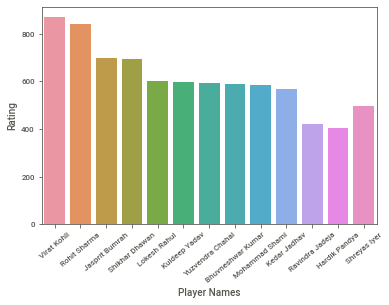

In [172]:
import seaborn as sns
%pylab inline

sns.barplot(x = 'Player Names', y = 'Rating', data = ind_players, ci = 0.0)
plt.xticks(rotation = 40)
plt.show()

In [194]:
fig = alt
fig.Chart(ind_players).mark_bar().encode(x = 'Player Names', y = 'Rating')

alt.Chart(...)

In [188]:
df[df.Team == '']

,Player Names,Team,Rating,Type,Position
Date,,,,,


In [32]:
df.Team.value_counts()

AUS    45675
ENG    38367
NZ     34713
AFG    32886
BAN    32886
PAK    32886
IND    31059
SA     27405
SL     25578
ZIM    21924
WI     20097
IRE    18270
SCO    16443
UAE     5481
PNG     5481
OMA     1827
Name: Team, dtype: int64

In [35]:
import seaborn as sns
%pylab inline


sns.barplot(x = df.Team, y = df.Team.value_counts(), data = df)
plt.show()

Populating the interactive namespace from numpy and matplotlib


ValueError: cannot reindex from a duplicate axis

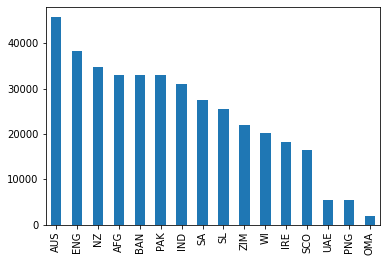

In [58]:
df['Team'].value_counts().plot(kind='bar')

In [ ]:
sns.scatterplot(x = df.Team, )

In [8]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
df.head()

,Player Names,Team,Rating,Type,Position
Date,,,,,
2016-01-01,Virat Kohli,IND,870,Batsmen,1
2016-01-01,Rohit Sharma,IND,842,Batsmen,2
2016-01-01,Babar Azam,PAK,837,Batsmen,3
2016-01-01,Ross Taylor,NZ,818,Batsmen,4
2016-01-01,Aaron Finch,AUS,791,Batsmen,5


2021-02-09 18:35:16.436 WARNING matplotlib.legend: No handles with labels found to put in legend.


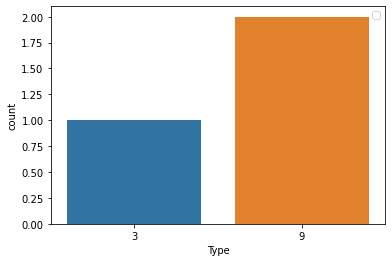

In [24]:
eng_players = df[(df['Team'] == 'ENG')][['Player Names', 'Position', 'Type']].\
sort_values(by = 'Type').drop_duplicates()

sns.countplot(x= eng_players['Type'].value_counts(), data = eng_players)
plt.legend()

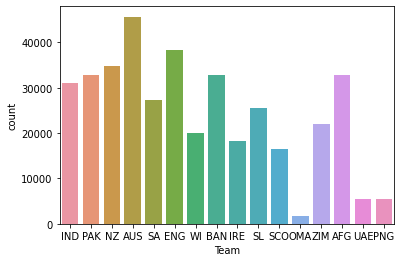

In [25]:
sns.countplot(x = df['Team'], data = df)

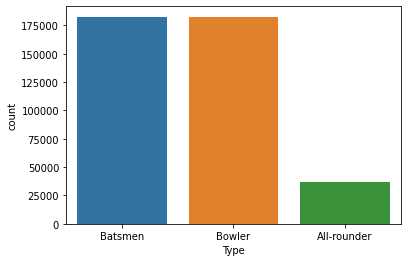

In [8]:
import seaborn as sns
sns.countplot(x= df['Type'], data = df)

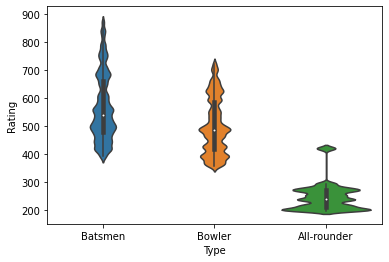

In [16]:
sns.violinplot(x = 'Type', y = 'Rating', data = df)

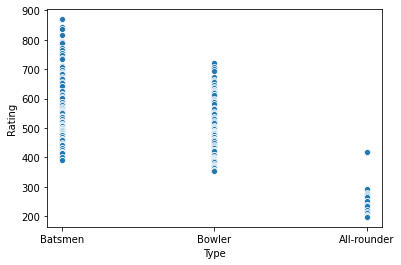

In [17]:
sns.scatterplot(x = 'Type', y = 'Rating', data = df)

In [74]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title = 'Pandas Profile Report', explorative = True)

In [75]:
%%time
profile.to_widgets()

,Date,Player Names,Team,Rating,Type,Position
0,2016-01-01,Virat Kohli,IND,870,Batsmen,1
1,2016-01-01,Rohit Sharma,IND,842,Batsmen,2
2,2016-01-01,Babar Azam,PAK,837,Batsmen,3
3,2016-01-01,Ross Taylor,NZ,818,Batsmen,4
4,2016-01-01,Aaron Finch,AUS,791,Batsmen,5
5,2016-01-01,Francois du Plessis,SA,790,Batsmen,6
6,2016-01-01,David Warner,AUS,773,Batsmen,7
7,2016-01-01,Kane Williamson,NZ,765,Batsmen,8
8,2016-01-01,Quinton de Kock,SA,755,Batsmen,9
9,2016-01-01,Jonny Bairstow,ENG,754,Batsmen,10


,Date,Player Names,Team,Rating,Type,Position
401930,2020-12-31,Sikandar Raza,ZIM,237,All-rounder,11
401931,2020-12-31,Hardik Pandya,IND,236,All-rounder,12
401932,2020-12-31,Andile Phehlukwayo,SA,221,All-rounder,13
401933,2020-12-31,Mehedi Hasan,BAN,216,All-rounder,14
401934,2020-12-31,Adil Rashid,ENG,212,All-rounder,15
401935,2020-12-31,Jason Holder,NaN,206,All-rounder,16
401936,2020-12-31,Marcus Stoinis,AUS,201,All-rounder,17
401937,2020-12-31,Glenn Maxwell,AUS,200,All-rounder,18
401938,2020-12-31,Kagiso Rabada,SA,199,All-rounder,19
401939,2020-12-31,Trent Boult,NZ,198,All-rounder,20


CPU times: user 24.8 s, sys: 2.69 s, total: 27.5 s
Wall time: 25.9 s


In [82]:
profile.to_file('output.html')

In [83]:
ProfileReport(df)

In [84]:
import sweetviz

In [86]:
report = sweetviz.analyze(df)

In [87]:
report.show_html('Sweetviz Report.html')

Report Sweetviz Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
